#Preprocessing Functions

In [ ]:
# https://drive.google.com/drive/folders/1IpwLxEhiCoKUOlIP_ZDIzntAjjfuwH_k?usp=sharing
# https://drive.google.com/file/d/1vRLeIHv1YJjfxzPty_yEA0q198wsdZM-/view?usp=sharing
# 1vRLeIHv1YJjfxzPty_yEA0q198wsdZM
!gdown --id 1vRLeIHv1YJjfxzPty_yEA0q198wsdZM-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# !cp -r /content/drive/MyDrive/files/Datasets .

!cp -r /content/drive/MyDrive/Datasets .

In [ ]:
for i in range(1):
  import pandas as pd 
  import nltk,spacy,re,requests,gensim,datetime,os#,nerer,twitter
  from  nltk.tokenize import word_tokenize
  from nltk.tokenize import sent_tokenize
  from nltk.corpus import stopwords
  from nltk.stem import WordNetLemmatizer
  from bs4 import BeautifulSoup
  from wordcloud import WordCloud,STOPWORDS
  import matplotlib.pyplot as plt
  from PIL import Image
  import numpy as np
  import seaborn as sns
  from gensim import models,corpora
  from time import time
  from matplotlib import style
  from sklearn import svm
  from warnings import simplefilter
  from sklearn.exceptions import ConvergenceWarning
  from nltk.corpus import sentiwordnet as swn
  simplefilter("ignore", category=ConvergenceWarning)
  simplefilter("ignore", category=DeprecationWarning)
  nltk.download('sentiwordnet')
  nltk.download('punkt')
  nltk.download('stopwords')
  nltk.download('wordnet')
  nltk.download('words')
  nltk.download('averaged_perceptron_tagger')
  nltk.download('maxent_ne_chunker')
  lemmatizer = WordNetLemmatizer()
  sns.set_style('darkgrid')

In [ ]:
novels = {"Black suits you.TXT":["Suspense","Thriller","Romance","Erotic"],
 "The Girl in Room 105.TXT": ["Romance","Fiction","Mystery"],
 "The Fault in our stars-1.TXT": ["Realistic Fiction"],
 "The one you cannot have.TXT": ["Romance"],
 "Murder on the orient express.TXT" : ["Crime","Mystery"],
 "You are the best wife.TXT" : ["Fiction"]

}
novels = {"Black suits you.TXT":["Thriller"],
 "The Girl in Room 105.TXT": ["Romance",],
 "The Fault in our stars-1.TXT": ["Fiction"],
 "The one you cannot have.TXT": ["Romance"],
 "Murder on the orient express.TXT" : ["Mystery"],
 "You are the best wife.TXT" : ["Fiction"]

}

os.listdir('Datasets')

['Murder on the orient express.TXT',
 'The Fault in our stars-1.TXT',
 'The Girl in Room 105.TXT',
 'You are the best wife.TXT',
 'Black suits you.TXT',
 'The one you cannot have.TXT']

In [ ]:

dfs = []
files = os.walk('Datasets')
for path,_,name in files:
  for fileName in name:
    file = open(path+"/"+fileName,errors='ignore').read()
    file = re.findall('.+',file)
    dfs.append(pd.DataFrame({"Novel_Name":fileName,"text":file,"genre":str(novels[fileName]),"language":'English'}))
df = pd.concat(dfs)
df

,Novel_Name,text,genre,language
0,Murder on the orient express.TXT,AN IMPORTANT PASSENGER ON THE TAURUS EXPRESS,['Mystery'],English
1,Murder on the orient express.TXT,It was five oclock on a winters morning in Syr...,['Mystery'],English
2,Murder on the orient express.TXT,By the step leading up into the sleeping-car s...,['Mystery'],English
3,Murder on the orient express.TXT,"It was freezingly cold, and this job of seeing...",['Mystery'],English
4,Murder on the orient express.TXT,Dubosc had overheard part of a conversation be...,['Mystery'],English
...,...,...,...,...
2323,The one you cannot have.TXT,Also by Preeti Shenoy,['Romance'],English
2324,The one you cannot have.TXT,THE SECRET WISH LIST,['Romance'],English
2325,The one you cannot have.TXT,Does true love really exist or is it just a cl...,['Romance'],English
2326,The one you cannot have.TXT,"At sixteen, Diksha like any girl her age, find...",['Romance'],English


In [ ]:
df[df['genre'].str.contains('Romance')]

,Novel_Name,text,genre,language
0,The Girl in Room 105.TXT,The Girl in Room 105,['Romance'],English
1,The Girl in Room 105.TXT,Chapter 1,['Romance'],English
2,The Girl in Room 105.TXT,Six months ago,['Romance'],English
3,The Girl in Room 105.TXT,"Stop, my bhai, stop, Saurabh said, snatching a...",['Romance'],English
4,The Girl in Room 105.TXT,"I am not drunk, I said. We were in a corner of...",['Romance'],English
...,...,...,...,...
2323,The one you cannot have.TXT,Also by Preeti Shenoy,['Romance'],English
2324,The one you cannot have.TXT,THE SECRET WISH LIST,['Romance'],English
2325,The one you cannot have.TXT,Does true love really exist or is it just a cl...,['Romance'],English
2326,The one you cannot have.TXT,"At sixteen, Diksha like any girl her age, find...",['Romance'],English


In [ ]:
#function for treatment of verbs form and apostrophe in text
def decontracted(phrase):
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def cleanData(text):
  text = text.lower()
  text = re.compile(r'https?://\S+|www\.\S+').sub(r'',text)
  text = re.compile(r'http?://\S+|www\.\S+').sub(r'',text)
  text = BeautifulSoup(text,'html.parser').text
  hashtags = [ [ tag[1: ] for tag in i.split() if tag.startswith('#') ] for i in [text] ]
  tags = [ [ ent[1: ] for ent in i.split() if ent.startswith("@") ] for i in [text] ]
  text = decontracted(text)
  text = [ " ".join([ sent for sent in text.split(" ") if sent.startswith("@") == False  ]) for text in [text]][0]
  text = re.sub('_',' ',emoji.demojize(text))
  text = text.replace('[^\w\s]','')
  text =  [" ".join(([word for word in word_tokenize(i) if not word in list((stopwords.words('english')))]))  for i in [text] ][0]
  text = lemmatizer.lemmatize(text)
  return text

In [ ]:
df_data = df.copy()
df_data['genre'] = df_data['genre'].apply(lambda x: [i for i in eval(x)])
#Column ['Text'] pre-processing by converting it to lower case
df_data.text = df_data.text.apply(lambda text:text.lower() if type(text) == str else text)
#HREF Links Removal
df_data.text = df_data.text.apply(lambda text: re.compile(r'https?://\S+|www\.\S+').sub(r'',text))
df_data.text = df_data.text.apply(lambda text: re.compile(r'http?://\S+|www\.\S+').sub(r'',text))
#HTML Text Removal
df_data.text = df_data.text.apply(lambda text: BeautifulSoup(text,'html.parser').text)
#removing numbers
df_data.text = df_data.text.apply(lambda text: re.sub('\d+','',text))
#Decontraction
df_data.text = df_data.text.apply(lambda x :decontracted(x))
#Punctuations Removal
df_data.text = df_data.text.str.replace('[^\w\s]','')
#StopWords Removal
df_data.text = [ " ".join(([word for word in word_tokenize(i) if not word in list((stopwords.words('english')))]))  for i in df_data.text ]
#Lemmatization - Aiming to remove inflectional endings and return the base meaning or dictionary meaning of a word also known as lemma
df_data.text = df_data.text.apply(lambda text: lemmatizer.lemmatize(text))
#Tokenization - We'll be using white space tokenizer as other tokenizers separate on condition which doesn't help us portray meaninng of words
df_data['tokenised_text'] = [[word for word in word_tokenize(i)] for i in df_data.text]
#Recheck for missing values
print("No Missing Data" if (df_data.text.isna().any()==False ) else False)

df_data

No Missing Data


,Novel_Name,text,genre,language,tokenised_text
0,Murder on the orient express.TXT,important passenger taurus express,[Mystery],English,"[important, passenger, taurus, express]"
1,Murder on the orient express.TXT,five oclock winters morning syria alongside pl...,[Mystery],English,"[five, oclock, winters, morning, syria, alongs..."
2,Murder on the orient express.TXT,step leading sleepingcar stood young french li...,[Mystery],English,"[step, leading, sleepingcar, stood, young, fre..."
3,Murder on the orient express.TXT,freezingly cold job seeing distinguished stran...,[Mystery],English,"[freezingly, cold, job, seeing, distinguished,..."
4,Murder on the orient express.TXT,dubosc overheard part conversation stranger sa...,[Mystery],English,"[dubosc, overheard, part, conversation, strang..."
...,...,...,...,...,...
2323,The one you cannot have.TXT,also preeti shenoy,[Romance],English,"[also, preeti, shenoy]"
2324,The one you cannot have.TXT,secret wish list,[Romance],English,"[secret, wish, list]"
2325,The one you cannot have.TXT,true love really exist cliche single kiss real...,[Romance],English,"[true, love, really, exist, cliche, single, ki..."
2326,The one you cannot have.TXT,sixteen diksha like girl age finds life revolv...,[Romance],English,"[sixteen, diksha, like, girl, age, finds, life..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

df_target = pd.DataFrame()
df_target['genre'] = df_data['genre']
df_target.genre = df_target.genre.apply(lambda x: x[0])
df_target = df_target.genre.replace({'Fiction':1,'Romance':2,"Thriller":3, "Mystery":4})
df_target.value_counts()
tfidfconverter = TfidfVectorizer(max_features=20000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
corpus  = tfidfconverter.fit_transform(df_data['text']).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


# count_vect = CountVectorizer()
# count_vect.fit_transform(X_train)
# k = tfidf_vectorizer.transform(["yes software engineer loves fact detectives"])
# k.shape
# CV_lr.predict(k)

In [ ]:
# k.shape
# X_train[1]
# tfidfconverter = TfidfVectorizer(max_features=200000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
# corpus  = tfidfconverter.fit_transform(df_data['text']).toarray()
tfidf_vectorizer.max_features = 3000
# tfidf_vectorizer.transform()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
X_train, X_test, Y_train, Y_test = train_test_split(corpus, df_target, test_size=0.20, stratify=df_target,random_state=30)
# RFC =RandomForestClassifier()
# RFC.fit(X_train,Y_train)
# y_pred =RFC.predict(X_test)
# print("Confusion Matrix")
# print(confusion_matrix(Y_test,y_pred))
# print("\nAccuracy of RandomForestClassifier Model: {}\n".format(accuracy_score(Y_test, y_pred)))
# print(classification_report(Y_test,y_pred))

In [ ]:
#Using Gridsearch optimal parameter tuning for Logistic Regression Classifier Model
from sklearn.model_selection import GridSearchCV
param_grid = {
   'random_state': [ 10, 25,30, 50 ],
   'class_weight' : ['balanced'],
  'multi_class':["auto"],
  "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

CV_lr = GridSearchCV(estimator = lr, param_grid=param_grid, cv= 3)
CV_lr.fit(X_train, Y_train)
print(CV_lr.best_params_)
print(CV_lr.best_estimator_)

y_pred_lr = CV_lr.predict(X_test)

print("Confusion Matrix \n {}".format(confusion_matrix(Y_test,y_pred_lr)))
print("Accuracy of : {}".format(accuracy_score(Y_test, y_pred_lr)))
print(classification_report(Y_test,y_pred_lr)) 

{'class_weight': 'balanced', 'multi_class': 'auto', 'random_state': 10, 'solver': 'liblinear'}
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Confusion Matrix 
 [[ 718  127   24   22]
 [ 101 1207   26   28]
 [  44   92  316   11]
 [  23   76    4  450]]
Accuracy of : 0.8231875191189967
              precision    recall  f1-score   support

           1       0.81      0.81      0.81       891
           2       0.80      0.89      0.84      1362
           3       0.85      0.68      0.76       463
           4       0.88      0.81      0.85       553

    accuracy                           0.82      3269
   macro avg       0.84      0.80      0.81      3269
weighted avg       0.83      0.82      0.82   

In [ ]:
def infer_tags(texts):
  texts = [decontracted(text) for text in texts]
  texts = [text.replace('[^\w\s]','') for text in texts]
  texts = [ " ".join(([word for word in word_tokenize(i) if not word in list((stopwords.words('english')))]))  for i in texts ]
  texts = [lemmatizer.lemmatize(text) for text in texts][0]
  print(texts)
  q_vec = tfidf_vectorizer.transform([texts])
  # q_pred = clf.predict(q_vec)
  # return multilabel_binarizer.inverse_transform(q_pred)
  return q_vec
infer_tags(["He killed me in a jiffy"])
# newCorp = tfidfconverter.fit_transform(["He killed me in a jiffy"])
# tfidfconverter.fit_transform()

He killed jiffy


<1x16163 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [ ]:
import numpy as np
import json
import nltk
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df_data['genre'])
y = multilabel_binarizer.transform(df_data['genre'])


tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000000)
xtrain, xval, ytrain, yval = train_test_split(df_data['text'], y, test_size=0.2, random_state=9)
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)
clf.fit(xtrain_tfidf, ytrain)
y_pred = clf.predict(xval_tfidf)
f1_score(yval, y_pred, average="micro")
y_pred_prob = clf.predict_proba(xval_tfidf)
t = 0.3
y_pred_new = (y_pred_prob >= t).astype(int)

In [ ]:
multilabel_binarizer.inverse_transform(y_pred)[0]

('Romance',)

In [ ]:
for i in range(len(y_pred)):
  print(multilabel_binarizer.inverse_transform(y_pred)[i])

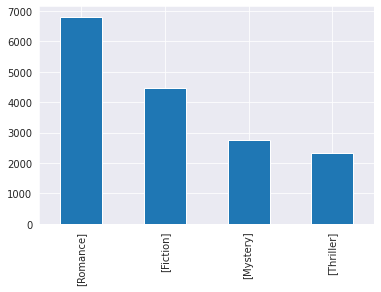

In [ ]:
df_data['genre'].value_counts().plot.bar()

# DL

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(corpus, df_target, test_size=0.20, stratify=df_target,random_state=30)


In [ ]:
x_train = tf.keras.utils.normalize(X_train, axis=1) 
x_test = tf.keras.utils.normalize(X_test, axis=1)  



In [ ]:
from keras.utils import to_categorical
train_label=to_categorical(X_train)
test_labels=to_categorical(Y_train)

In [ ]:
input_dim = X_train.shape[1]
input_dim2 = Y_train.shape[0]

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(input_dim, input_dim2, epochs=100, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras import layers
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 10)                48480     
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 11        
Total params: 48,491
Trainable params: 48,491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=10,validation_data=(X_test, Y_test),batch_size=50)

Epoch 1/10
263/263 [==============================] - 1s 3ms/step - loss: -46273.5742 - accuracy: 0.2743 - val_loss: -46305.8008 - val_accuracy: 0.2744
Epoch 2/10
263/263 [==============================] - 1s 3ms/step - loss: -46581.6055 - accuracy: 0.2743 - val_loss: -46616.5078 - val_accuracy: 0.2744
Epoch 3/10
263/263 [==============================] - 1s 3ms/step - loss: -46897.3555 - accuracy: 0.2743 - val_loss: -46935.2812 - val_accuracy: 0.2744
Epoch 4/10
263/263 [==============================] - 1s 3ms/step - loss: -47220.4180 - accuracy: 0.2743 - val_loss: -47260.8555 - val_accuracy: 0.2744
Epoch 5/10
263/263 [==============================] - 1s 3ms/step - loss: -47550.0938 - accuracy: 0.2743 - val_loss: -47593.0000 - val_accuracy: 0.2744
Epoch 6/10
263/263 [==============================] - 1s 3ms/step - loss: -47886.2812 - accuracy: 0.2743 - val_loss: -47930.1836 - val_accuracy: 0.2744
Epoch 7/10
263/263 [==============================] - 1s 3ms/step - loss: -48227.0742 - 

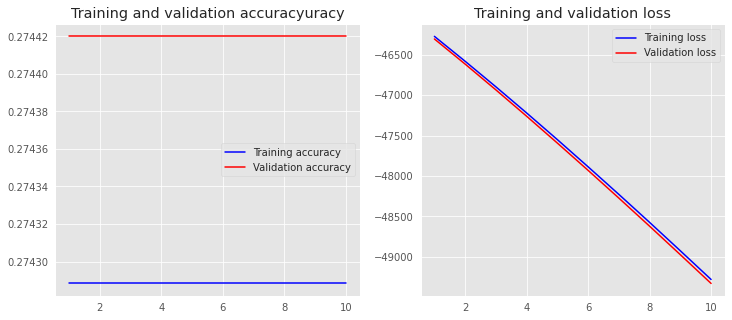

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training accuracy')
    plt.plot(x, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracyuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

#Gutenberg

In [ ]:
!pip install gutenberg-cleaner
import nltk
import gutenberg_cleaner
nltk.download('punkt')
import pandas as pd
import re
from concurrent.futures import ThreadPoolExecutor
from nltk.tokenize import sent_tokenize
import shutil
import urllib.request as request
from contextlib import closing
import requests
from bs4 import BeautifulSoup
import os

In [ ]:
# Miscellaneous
# !pip install https://github.com/aparrish/gutenberg-dammit/archive/master.zip
# !wget -w 2 -m http://corpus-db.org/api/id/8.0/fulltext
# !gdown --id 0B2Mzhc7popBga2RkcWZNcjlRTGM
# !unzip /content/Gutenberg.zip

In [ ]:
!cp /content/drive/MyDrive/UGRA/DataSetFresh.tar.gz .
!mkdir DataSetFresh
!tar -xvzf DataSetFresh.tar.gz -C /content/DataSetFresh/
!ls DataSetFresh/content/DataSetFresh/ | grep "" -c
!unzip -o /content/DataSetFresh/content/DataSetFresh1/\*.zip -d "/content/NewTemp/"
!rm -r -f DataSetFresh/
!wget https://www.gutenberg.org/cache/epub/feeds/rdf-files.tar.zip
!tar -xvzf rdf-files.tar.zip

In [ ]:
links = []
def linkAppender(url):
  print(len(links))
  out = requests.get(url)
  soup = BeautifulSoup(out.text,'html.parser')
  for i in soup.find_all('a'):
    links.append(i.get('href'))
    url = "http://www.gutenberg.org/robot/"+links[-1]
    while "harvest" in url:
      links.pop(-1)
      return linkAppender(url)
  return
linkAppender('http://www.gutenberg.org/robot/harvest?filetypes[]=txt&langs[]=en')

In [ ]:
pattern = re.compile('((\[.+|.+\])|\n\n)')
def cleanHeaderFooter(string):
  filteredData = gutenberg_cleaner.super_cleaner(string)
  cleanData = pattern.sub("",filteredData)
  return cleanData

In [ ]:
novelData = [i.replace(".txt","") for i in os.listdir('NewTemp/') if i.endswith(".txt")]
len(novelData)
novelData[:5]

['36880', '18388', '2826', '36313', '5490']

In [ ]:
def fileDownloadAndSave(url):
  try:
    url = url.replace("http","ftp").replace("https","ftp")
    fileName = re.findall('(?=\w+\.\w{3,4}$).+',url)[0]
    with closing(request.urlopen(url)) as r:
      with open("DataSetFresh1/"+fileName, 'wb') as f:
        shutil.copyfileobj(r, f)
  except Exception as e:
    print(e)
  return

with ThreadPoolExecutor(20) as executor:
  for _ in executor.map(fileDownloadAndSave,links):
    pass

In [ ]:
dfs = []
def dataFrameMaker(i):
  fname = re.findall('/([0-9]+)',i)[0]
  file = open(f"cache/epub/{fname}/pg{fname}.rdf")
  genres = re.findall('<rdf:value>([^<]*)',file.read())
  text = open(i,errors='ignore').read()
  dfs.append(pd.DataFrame({"text":[text],"genres":[genres]}))
with ThreadPoolExecutor(5) as executor:
  for _ in executor.map(dataFrameMaker,novelData):
    pass

In [ ]:
dj = {"NovelID":[],"Genres":[]}
for file in novelData:
  try:
    with open(f"/content/cache/epub/{file}/pg{file}.rdf") as f:
      genres = re.findall('<rdf:value>([^<]*)',f.read())
      dj['NovelID'].append(file)
      dj['Genres'].append(genres)
  except Exception as e:
    print(e)

[Errno 2] No such file or directory: '/content/cache/epub/64349-8/pg64349-8.rdf'
[Errno 2] No such file or directory: '/content/cache/epub/89-AnnexI/pg89-AnnexI.rdf'
[Errno 2] No such file or directory: '/content/cache/epub/64400-0/pg64400-0.rdf'
[Errno 2] No such file or directory: '/content/cache/epub/89-Contents/pg89-Contents.rdf'
[Errno 2] No such file or directory: '/content/cache/epub/64317-0/pg64317-0.rdf'
[Errno 2] No such file or directory: '/content/cache/epub/89-Descriptions/pg89-Descriptions.rdf'
[Errno 2] No such file or directory: '/content/cache/epub/10681-body/pg10681-body.rdf'
[Errno 2] No such file or directory: '/content/cache/epub/3290-u/pg3290-u.rdf'


In [ ]:
import pandas as pd
df = pd.read_csv('genredj.csv')
df=df.explode('Genres')
df.Genres = df.Genres.str.lower()
df = df.drop('Unnamed: 0', axis=1)
df.head()

,NovelID,Genres
0,36880,text
1,36880,pz
2,36880,uncles -- juvenile fiction
3,36880,christian life -- juvenile fiction
4,36880,young women -- conduct of life -- juvenile fic...


In [ ]:
genreFrame = df['Genres'].value_counts().to_frame()
genreFrame = genreFrame.reset_index()
genreFrame.columns =['Genre','Count']
genreFrame

,Genre,Count
0,text,37613
1,ps,7695
2,pr,6512
3,pz,5083
4,science fiction,3111
...,...,...
23874,slaves -- drama,1
23875,united states. bureau of mines -- juvenile fic...,1
23876,art and morals,1
23877,women in charitable work -- england -- fiction,1


In [ ]:
genreFrame[genreFrame.Genre.str.contains('horror')] # fantasy

,Genre,Count
231,horror tales,71
519,horror,34
1099,"horror tales, english",14
2177,"horror tales, american",7
11298,horror films,1
17475,horror tales -- appreciation -- fiction,1
18108,"horror tales, english -- history and criticism",1


In [ ]:
genreFrame[genreFrame.Genre.str.contains('horror')]['Genre'][:5].tolist()

['horror tales',
 'horror',
 'horror tales, english',
 'horror tales, american',
 'horror films']

In [ ]:
# genreFrame[genreFrame.Genre.str.contains('fantasy')]
df1 = df.loc[df['Genres'] == 'fantasy fiction']
df1['Genres'] = 'Fiction'
df2 = df.loc[df['Genres'].isin(genreFrame[genreFrame.Genre.str.contains('horror')]['Genre'][:5].tolist())]
df2['Genres'] = 'Horror'
horror_fantasyDF = pd.concat([df1,df2])
horror_fantasyDF = horror_fantasyDF.to_dict()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
ndj = {'Text':{},'Genre':{},'Novel_id':{}}
for name in horror_fantasyDF['NovelID']:
  filename = horror_fantasyDF['NovelID'][name]
  Genre = horror_fantasyDF['Genres'][name]
  with open(f'NewTemp/{filename}.txt',errors='ignore') as f:
    string = f.read()
  ndj['Text'][name] = cleanHeaderFooter(string)
  ndj['Novel_id'][name] = filename
  ndj['Genre'][name] = Genre

In [ ]:
horror_fantasyDF = pd.DataFrame(ndj)
horror_fantasyDF.to_csv('horror_fantasy.csv')
!mv horror_fantasy.csv drive/MyDrive/UGRA/

In [ ]:
FictionDataFrame = df.loc[ df.Genres.isin(genreFrame[genreFrame.Genre.str.contains('fiction')].head(5)['Genre'].to_list())]
fictionNovelIds = list(map(lambda x: str(x)+".txt",FictionDataFrame['NovelID'].to_list()))
FictionDataFrame.head()

,NovelID,Genres
21,36313,conduct of life -- juvenile fiction
72,39768,fiction
87,32054,science fiction
88,32054,science fiction
101,14303,fiction


In [ ]:
fictionNovelDict = FictionDataFrame[['NovelID','Genres']].to_dict()
fictionNovelDict

In [ ]:
(ngenreFrame = genreFrame.loc[(genreFrame.Count>50) & (genreFrame.Genre.str.len()>4) &]
ngenreFrame.Genre.tolist()

In [ ]:
ndj = {'Text':{},'Genre':{},'Novel_id':{}}
for name in fictionNovelDict['NovelID']:
  filename = fictionNovelDict['NovelID'][name]
  Genre = fictionNovelDict['Genres'][name]
  with open(f'NewTemp/{filename}.txt',errors='ignore') as f:
    string = f.read()
  ndj['Text'][name] = cleanHeaderFooter(string)
  ndj['Novel_id'][name] = filename
  ndj['Genre'][name] = Genre

In [ ]:
tff = pd.read_csv('drive/MyDrive/UGRA/fiction.csv')
tff = tff.reset_index()
tff = tff.drop(["index","Unnamed: 0"],axis=1)
tff['Genre'] = tff.Genre.replace({"conduct of life -- juvenile fiction":"juvenile fiction","man-woman relationships -- fiction":"romantic fiction"})
tff['Genre'].value_counts()

science fiction       3111
fiction               1204
historical fiction     764
juvenile fiction       648
romantic fiction       420
Name: Genre, dtype: int64

In [ ]:
tff.head()

,Text,Genre,Novel_id
0,\nFor those who have not read the first volume...,juvenile fiction,36313
1,generously made available by The Internet Arch...,fiction,39768
2,Transcriber's Note:\n...,science fiction,32054
3,Transcriber's Note:\n...,science fiction,32054
4,The Riverside Press Cambridge\n1911III\n_Encou...,fiction,14303


In [ ]:
def cleanDataFrame(df):
  df_data = df.copy()
  # df_data['Genre'] = df_data['Genre'].apply(lambda x: [i for i in eval(x)])
  #Column ['Text'] pre-processing by converting it to lower case
  df_data.Text = df_data.Text.str.lower()
  # Sentence Tokenise
  df_data.['SentenceTokenised'] = df_data.Text.apply(lambda text: sent_tokenize(text))
  #HREF Links Removal
  df_data.Text = df_data.Text.apply(lambda text: re.compile(r'https?://\S+|www\.\S+').sub(r'',text))
  df_data.Text = df_data.Text.apply(lambda text: re.compile(r'http?://\S+|www\.\S+').sub(r'',text))
  #HTML Text Removal
  df_data.Text = df_data.Text.apply(lambda text: BeautifulSoup(text,'html.parser').text)
  #removing numbers
  df_data.Text = df_data.Text.apply(lambda text: re.sub('\d+','',text))
  #Decontraction
  df_data.Text = df_data.Text.apply(lambda x :decontracted(x))
  #Punctuations Removal
  df_data.Text = df_data.Text.str.replace('[^\w\s]','')
  #StopWords Removal
  df_data.Text = [ " ".join(([word for word in word_tokenize(i) if not word in list((stopwords.words('english')))]))  for i in df_data.Text ]
  #Lemmatization - Aiming to remove inflectional endings and return the base meaning or dictionary meaning of a word also known as lemma
  df_data.Text = df_data.Text.apply(lambda text: lemmatizer.lemmatize(text))
  #Tokenization - We'll be using white space tokenizer as other tokenizers separate on condition which doesn't help us portray meaninng of words
  df_data['tokenised_text'] = [[word for word in word_tokenize(i)] for i in df_data.Text]
  #Recheck for missing values
  print("No Missing Data" if (df_data.Text.isna().any()==False ) else False)

  df_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
sentenceDF = pd.read_csv('/content/drive/MyDrive/UGRA/lilFilterFiction.csv')
sentenceDF[['SentenceTokenised']] = sentenceDF['SentenceTokenised'].apply(lambda x: eval(x))
sentenceDF = sentenceDF.explode('SentenceTokenised')[['Genre','Novel_id','SentenceTokenised']]
# sentenceDF.columns = ['Genre','Novel_id','Text']
# sentenceDF.Text = sentenceDF.Text.apply(lambda text: re.compile(r'https?://\S+|www\.\S+').sub(r'',text))
# sentenceDF.Text = sentenceDF.Text.apply(lambda text: re.compile(r'http?://\S+|www\.\S+').sub(r'',text))
#HTML Text Removal
sentenceDF.Text = sentenceDF.Text.apply(lambda text: BeautifulSoup(text,'html.parser').text)
#removing numbers
sentenceDF.Text = sentenceDF.Text.apply(lambda text: re.sub('\d+','',text))
#Decontraction
sentenceDF.Text = sentenceDF.Text.apply(lambda x :decontracted(x))
#Punctuations Removal
sentenceDF.Text = sentenceDF.Text.str.replace('[^\w\s]','')
#StopWords Removal
sentenceDF.Text = [ " ".join(([word for word in word_tokenize(i) if not word in list((stopwords.words('english')))]))  for i in sentenceDF.Text ]
#Lemmatization - Aiming to remove inflectional endings and return the base meaning or dictionary meaning of a word also known as lemma
sentenceDF.Text = sentenceDF.Text.apply(lambda text: lemmatizer.lemmatize(text))
#Tokenization - We'll be using white space tokenizer as other tokenizers separate on condition which doesn't help us portray meaninng of words
sentenceDF['tokenised_text'] = [[word for word in word_tokenize(i)] for i in sentenceDF.Text]
#Recheck for missing values
print("No Missing Data" if (sentenceDF.Text.isna().any()==False ) else False)

In [ ]:
fracDF.columns = ['Genre','Novel_id','Text']
fracDF.Text = fracDF.Text.apply(lambda text: re.compile(r'https?://\S+|www\.\S+').sub(r'',text))
fracDF.Text = fracDF.Text.apply(lambda text: re.compile(r'http?://\S+|www\.\S+').sub(r'',text))
#HTML Text Removal
fracDF.Text = fracDF.Text.apply(lambda text: BeautifulSoup(text,'html.parser').text)
#removing numbers
fracDF.Text = fracDF.Text.apply(lambda text: re.sub('\d+','',text))
#Decontraction
fracDF.Text = fracDF.Text.apply(lambda x :decontracted(x))
#Punctuations Removal
fracDF.Text = fracDF.Text.str.replace('[^\w\s]','')
fracDF.Text = fracDF.Text.str.replace('\n','')
#StopWords Removal
fracDF.Text = [ " ".join(([word for word in word_tokenize(i) if not word in list((stopwords.words('english')))]))  for i in fracDF.Text ]
#Lemmatization - Aiming to remove inflectional endings and return the base meaning or dictionary meaning of a word also known as lemma
fracDF.Text = fracDF.Text.apply(lambda text: lemmatizer.lemmatize(text))
#Tokenization - We'll be using white space tokenizer as other tokenizers separate on condition which doesn't help us portray meaninng of words
fracDF['tokenised_text'] = [[word for word in word_tokenize(i)] for i in fracDF.Text]
#Recheck for missing values
print("No Missing Data" if (fracDF.Text.isna().any()==False ) else False)

In [ ]:
fracDF = sentenceDF.sample(frac=1)
fracDF.to_csv('fracDF.csv')

In [ ]:
fracDF.head(100)

,Genre,Novel_id,Text
683,fiction,29743,hewas only looking to see whether the telling ...
4037,fiction,29699,retorted norah sureshes as foine a crayther as...
4939,fiction,12450,and a certainty grew in his brainthat it was t...
1474,juvenile fiction,43134,miss fforde had danced oncebut only once
2370,romantic fiction,40064,nobody ever asks them whether or not they wish...
...,...,...,...
4154,romantic fiction,38703,carstares clapped a hand on his shoulder
5565,romantic fiction,19742,she wanted toplay heroine now with somerled as...
3295,romantic fiction,38796,err onthe safe side he said
148,science fiction,23612,i wouldadvise you to expect your best informat...


In [ ]:
fracDF.to_csv('/content/fracDF.csv')

In [ ]:
!cp fracDF.csv /content/drive/MyDrive/UGRA

#Bert

In [ ]:
!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
!unzip uncased_L-12_H-768_A-12.zip
!pip install BertLibrary
!pip install tensorflow-gpu==1.15.0

In [ ]:
import pandas as pd
# fracDF = pd.read_csv('/content/drive/MyDrive/UGRA/fracDF.csv')
# fracDF = pd.read_csv('/content/drive/MyDrive/UGRA/horrorFictionSentTokenised.csv')
df = pd.read_csv('/content/teemp.csv')

In [ ]:
df.head()

,Unnamed: 0,Sent_Tokenize,Genre
0,0,monsieur savary member le academie des sciences,Fiction
1,1,sternetristram shandy ch,Fiction
2,2,cccxxii,Fiction
3,3,towards end month october 1829 young man enter...,Fiction
4,4,mounted staircase one gambling hells distingui...,Fiction


In [ ]:
from sklearn.model_selection import train_test_split
from BertLibrary import BertFTModel
TRAIN_SIZE = 0.75
VAL_SIZE = 0.15
label_text = df[['Sent_Tokenize','Genre']]
label_text['Sent_Tokenize'] = label_text.Genre.replace({'Fiction':1, 'Horror':2})
dataset_count = len(label_text)

df_train_val, df_test = train_test_split(label_text, test_size=1-TRAIN_SIZE-VAL_SIZE, random_state=30)
df_train, df_val = train_test_split(df_train_val, test_size=VAL_SIZE / (VAL_SIZE + TRAIN_SIZE), random_state=30)

print("TRAIN size:", len(df_train))
print("VAL size:", len(df_val))
print("TEST size:", len(df_test))
ft_model = BertFTModel( model_dir='uncased_L-12_H-768_A-12',ckpt_name="bert_model.ckpt",
                       labels=['1','2'],lr=1e-05,num_train_steps=30000,
                       num_warmup_steps=1000,ckpt_output_dir='output',save_check_steps=1000,
                       do_lower_case=False,max_seq_len=50,batch_size=32,)
ft_trainer =  ft_model.get_trainer()
ft_evaluator = ft_model.get_evaluator()

TRAIN size: 563085
VAL size: 112618
TEST size: 75079
INFO:tensorflow:Using config: {'_model_dir': 'output', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 1000, '_save_checkpoints_secs': None, '_session_config': device_count {
  key: "GPU"
  value: 1
}
gpu_options {
  per_process_gpu_memory_fraction: 0.5
  allow_growth: true
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f7e3cc02198>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
!mkdir ddatas
df_train.sample(frac=1.0).reset_index(drop=True).to_csv('ddatas/train.tsv', sep='\t', index=None, header=None)
df_val.to_csv('ddatas/dev.tsv', sep='\t', index=None, header=None)
df_test.to_csv('ddatas/test.tsv', sep='\t', index=None, header=None)
! cd ddatas && ls

mkdir: cannot create directory ‘ddatas’: File exists
dev.tsv  test.tsv  train.tsv


In [ ]:
ft_trainer.train_from_file('ddatas',steps=30000)

In [ ]:
# https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17
# https://towardsdatascience.com/multi-class-text-classification-with-lstm-using-tensorflow-2-0-d88627c10a35


In [ ]:
ft_evaluator.evaluate_from_file('ddatas') 
predictor =  ft_model.get_predictor()

In [ ]:
predictor(['dont come said softly tiny smile old face'])

array([[0.55136305, 0.44863695]], dtype=float32)

In [ ]:
df[df['Genre'] == 'Horror']['Sent_Tokenize'][750777]

'dont come said softly tiny smile old face'

In [ ]:
import tensorflow as tf
import os
path = 'output'
#path to output the new optimized model
output_path = os.path.join(path, 'optimized_model')
my_vars = []
new_graph = tf.Graph()
with tf.Session(graph=new_graph) as sess:
  saver = tf.train.import_meta_graph('output/model.ckpt-15000.meta')
  saver.restore(sess,'output/model.ckpt-15000') #based on the steps of your fine-tuned model
  for var in tf.all_variables():
    if 'adam_v' not in var.name and 'adam_m' not in var.name:
      my_vars.append(var)
  saver = tf.train.Saver(my_vars)
  saver.save(sess, os.path.join(output_path, 'genreAnshajHorrorFiction.ckpt'))

INFO:tensorflow:Restoring parameters from output/model.ckpt-15000
Instructions for updating:
Please use tf.global_variables instead.


In [ ]:
!cp uncased_L-12_H-768_A-12/vocab.txt output/optimized_model

In [ ]:
!mv output/ drive/MyDrive/UGRA/

#TFIDF corpus

In [ ]:
!gdown --id 1cgsexJtnY_0V-0xkoZLH98snE_adEfVk

In [ ]:
import pandas as pd
import re
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')

df = pd.read_csv('horror_fantasy.csv')
df = df.drop('Unnamed: 0',axis=1)
pattern = re.compile('[^\w\s]|(\n)')
df['Text'] = df['Text'].apply(lambda x: pattern.sub(" ",x).lower().strip())
df['Token_Text'] = df['Text'].apply(word_tokenize)
df

In [ ]:

nltk.download('stopwords')
from nltk.corpus import stopwords


stWords = stopwords.words('english')
df['StopWordLessTokens'] = df['Token_Text'].apply(lambda x: [i for i in x if i not in stWords])
df['Word_Lenth'] = df.Token_Text.apply(lambda x: len(x))
df['Top_5000'] = df['StopWordLessTokens'].apply(lambda x: x[:5000])
df['Last_5000'] = df['StopWordLessTokens'].apply(lambda x: x[-5000:])
df['Random_5000'] = df['StopWordLessTokens'].apply(lambda x: x[::max(len(x)//5000,1)])
df.head()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from collections import Counter
allWords = [j for i in df.StopWordLessTokens for j in i]
uniqueWords = Counter(allWords)
len(uniqueWords)

86735

In [ ]:
cdf = pd.DataFrame(uniqueWords,index=[0]).T

In [ ]:
cdf = cdf.reset_index()
cdf.columns = ['Word','Count']
cdf = cdf.sort_values('Count',ascending=False,axis=0)
cdf

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df.Text)
X_train_counts.shape

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

# ML Classification

In [ ]:
df1=df.copy()
df1.head()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

**Naive Bayes**

In [ ]:
# Column="StopWordLessTokens"
# Column="Top_5000"
# Column="Last_5000"
Column="Random_5000"

In [ ]:
print("Training\n",(df1["Genre"].reset_index().groupby("Genre").count()))
print("\nTesting\n",(df1["Genre"].reset_index().groupby("Genre").count()))

Training
          index
Genre         
Fiction    165
Horror     127

Testing
          index
Genre         
Fiction    165
Horror     127


In [ ]:
df1=df.copy()
# df1[Column] = df1[Column].astype('str')
df1[Column] = df1[Column].apply(lambda x: " ".join(x))
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df1[Column],df1['Genre'],test_size=0.3,random_state=20)
Encoder = LabelEncoder()
# 0 Fiction
# 1 Horror
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [ ]:
Tfidf = TfidfVectorizer(max_features=100000)
Tfidf.fit(df1[Column])
Train_X_Tf = Tfidf.transform(Train_X)
Test_X_Tf = Tfidf.transform(Test_X)

In [ ]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tf,Train_Y)
pred_nb = Naive.predict(Test_X_Tf)

In [ ]:
kk = ['Fiction','Horror']
test_k = Tfidf.transform(kk)
pred_nb = Naive.predict(test_k)
pred_nb

array([0, 1])

In [ ]:
print("NB Accuracy=",accuracy_score(pred_nb, Test_Y)*100)
print("Confusion Matrix \n",confusion_matrix(pred_nb, Test_Y))
print(classification_report(Test_Y, pred_nb))


NB Accuracy= 81.81818181818183
Confusion Matrix 
 [[48 10]
 [ 6 24]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        54
           1       0.80      0.71      0.75        34

    accuracy                           0.82        88
   macro avg       0.81      0.80      0.80        88
weighted avg       0.82      0.82      0.82        88



**SVM**

In [ ]:
SVM = svm.SVC(C=2.0, kernel='linear', degree=3, gamma='auto')

SVM.fit(Train_X_Tf,Train_Y)
pred_svm = SVM.predict(Test_X_Tf)

In [ ]:
print("SVM Accuracy =",accuracy_score(pred_svm, Test_Y)*100)
print("Confusion Matrix \n",confusion_matrix(pred_svm, Test_Y))
print(classification_report(Test_Y, pred_svm))


SVM Accuracy = 85.22727272727273
Confusion Matrix 
 [[48  7]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        54
           1       0.82      0.79      0.81        34

    accuracy                           0.85        88
   macro avg       0.85      0.84      0.84        88
weighted avg       0.85      0.85      0.85        88



#Text edit

In [ ]:
df = pd.read_csv('horror_fantasy.csv')
df = df.drop('Unnamed: 0',axis=1)
df['Sent_Tokenize'] = df['Text'].apply(sent_tokenize)
df['Sent_Tokens_Lenth'] = df['Sent_Tokenize'].apply(lambda x: len(x))
df1 = df[['Sent_Tokenize','Genre']]
df

In [ ]:
df1.Sent_Tokenize[1]

'STERNE--Tristram Shandy, ch.'

In [ ]:
import string
df1 = df1.explode('Sent_Tokenize',ignore_index=True)
pat = {10:None,32: ' ', 33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ', 41: ' ', 42: ' ', 43: ' ', 44: ' ', 45: ' ', 46: ' ', 47: ' ', 58: ' ', 59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ', 93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
# df1.Sent_Tokenize = df1.Sent_Tokenize.str.translate(str.maketrans(' ', ' ', string.punctuation))
df1.Sent_Tokenize = df1.Sent_Tokenize.apply(lambda x: str(x).translate(pat).strip())
df1['Sent_Tokenize'] = df1['Sent_Tokenize'].apply(word_tokenize)
df1

,Sent_Tokenize,Genre
0,"[To, Monsieur, Savary, Member, of, Le, Academi...",Fiction
1,"[STERNE, Tristram, Shandy, ch]",Fiction
2,[cccxxii],Fiction
3,"[Towards, the, end, of, the, month, of, Octobe...",Fiction
4,"[He, mountedthe, staircase, of, one, of, the, ...",Fiction
...,...,...
750777,"[They, don, t, come, to, me, he, said, softly,...",Horror
750778,"[It, s, that, old, medieval, Craik, with, afac...",Horror
750779,"[And, again, he, sat, with, head, a, littlesid...",Horror
750780,"[A, cloud, as, it, were, of, youth, drew, over...",Horror


In [ ]:
df2 = df1.copy()
pattern = re.compile('[^\w\s]|(\n)')
df2['Sent_Tokenize'] = df2['Sent_Tokenize'].apply(lambda y: [pattern.sub(" ",x).lower().strip() for x in y])
# nltk.download('stopwords')
from nltk.corpus import stopwords
stWords = stopwords.words('english')
df2['Sent_Tokenize'] = df2['Sent_Tokenize'].apply(lambda x: " ".join([i for i in x if i not in stWords]))
df2['Sent_Tokenize'] = df2['Sent_Tokenize'].apply(lambda x: re.sub('\d+','',x))
df2

,Sent_Tokenize,Genre
0,monsieur savary member le academie des sciences,Fiction
1,sterne tristram shandy ch,Fiction
2,cccxxii,Fiction
3,towards end month october 1829 young man enter...,Fiction
4,mountedthe staircase one gambling hells distin...,Fiction
...,...,...
750777,come said softly atiny smile old face,Horror
750778,old medieval craik aface like last year rookery,Horror
750779,sat head littlesidelong listening infinitesima...,Horror
750780,cloud youth drew wrinkled skin composed thebir...,Horror


In [ ]:
df2.to_csv('teemp.csv')

In [ ]:
import pandas as pd
df = pd.read_csv('teemp.csv')
df.columns = ['useless','text','label']
df

,useless,text,label
0,0,monsieur savary member le academie des sciences,Fiction
1,1,sterne tristram shandy ch,Fiction
2,2,cccxxii,Fiction
3,3,towards end month october young man entered t...,Fiction
4,4,mountedthe staircase one gambling hells distin...,Fiction
...,...,...,...
750777,750777,come said softly atiny smile old face,Horror
750778,750778,old medieval craik aface like last year rookery,Horror
750779,750779,sat head littlesidelong listening infinitesima...,Horror
750780,750780,cloud youth drew wrinkled skin composed thebir...,Horror


In [ ]:
# df = df.drop(df[df.text.isnull()].index,axis=0)
df['text'] = df['text'].replace({"Fiction":0,"Horror":1})

# LSTM

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 398727 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (740444, 250)


In [ ]:
Y = pd.get_dummies(df['label']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (740444, 2)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(666399, 250) (666399, 2)
(74045, 250) (74045, 2)


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_9 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 202       
Total params: 5,080,602
Trainable params: 5,080,602
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

In [ ]:
df.to_csv('finalSentHorrorFiction.csv')

In [ ]:
!mv finalSentHorrorFiction.csv drive/MyDrive/UGRA/

#CNN

In [ ]:
!gdown --id 1wuP2YtihE7HyiBeOykZoB3Ftch7fHbcR

Downloading...
From: https://drive.google.com/uc?id=1wuP2YtihE7HyiBeOykZoB3Ftch7fHbcR
To: /content/finalSentHorrorFiction.csv
68.7MB [00:00, 99.7MB/s]


In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import pandas as pd

In [ ]:
df = pd.read_csv('finalSentHorrorFiction.csv')
df = df.drop(['Unnamed: 0','useless'],axis=1)
df

,text,label
0,monsieur savary member le academie des sciences,Fiction
1,sterne tristram shandy ch,Fiction
2,cccxxii,Fiction
3,towards end month october young man entered t...,Fiction
4,mountedthe staircase one gambling hells distin...,Fiction
...,...,...
740439,come said softly atiny smile old face,Horror
740440,old medieval craik aface like last year rookery,Horror
740441,sat head littlesidelong listening infinitesima...,Horror
740442,cloud youth drew wrinkled skin composed thebir...,Horror


In [ ]:
# Our dictionary will contain only of the top 7000 words appearing most frequently
# top_words = 7000
# Now we split our data-set into training and test data
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# Looking at the nature of training data
# print(X_train[0])
# print(y_train[0])
# print('Shape of training data: ')
# print(X_train.shape)
# print(y_train.shape)
# print('Shape of test data: ')
# print(X_test.shape)
# print(y_test.shape)

In [ ]:
model = Sequential()
# Adding the embedding layer which will take in maximum of 450 words as input and provide a 32 dimensional output of those words which belong in the top_words dictionary
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 250, 32)           9632      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 125, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               1000250   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 502       
Total params: 6,010,384
Trainable params: 6,010,384
Non-trainable params: 0
____________________________________________

In [ ]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=2, batch_size=64, verbose=2,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
# Getting score metrics from our model
# scores = model.evaluate(X_test, Y_test, verbose=0)
# Displays the accuracy of correct sentiment prediction over test data
# print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/2
10413/10413 - 1144s - loss: 0.4856 - accuracy: 0.7305 - val_loss: 0.4842 - val_accuracy: 0.7301
Epoch 2/2
10413/10413 - 1133s - loss: 0.4135 - accuracy: 0.7799 - val_loss: 0.4884 - val_accuracy: 0.7328


Accuracy: 73.28%


In [ ]:
model.save('CNNmodel.h5')

In [ ]:
!mv CNNmodel.h5 drive/MyDrive/UGRA/

#RNN

In [ ]:
!cp drive/MyDrive/UGRA/glove.6B.100d.txt .

In [ ]:
import numpy as np
import pandas as pd
import pickle
from collections import defaultdict
import re
from bs4 import BeautifulSoup
import sys
import os
os.environ['KERAS_BACKEND']='theano'
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, GRU, Bidirectional
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
plt.switch_backend('agg')
from keras import backend as K
from keras.engine.topology import Layer, InputSpec
from keras import initializers
%matplotlib inline

In [ ]:
MAX_SEQUENCE_LENGTH = 250
MAX_NB_WORDS = 50000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.1

In [ ]:
print('Shape of dataset ',df.shape)
print(df.columns)
print('No. of unique classes',len(set(df['label'])))

Shape of dataset  (740444, 2)
Index(['text', 'label'], dtype='object')
No. of unique classes 2


In [ ]:
macronum=sorted(set(df['label']))
macro_to_id = dict((note, number) for number, note in enumerate(macronum))

def fun(i):
    return macro_to_id[i]

df['label']=df['label'].apply(fun)

In [ ]:
texts = df.text.to_list()
labels = df.label.to_list()

In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index

print('Number of Unique Tokens',len(word_index))

Number of Unique Tokens 398727


In [ ]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


labels = to_categorical(np.asarray(labels))
print('Shape of Data Tensor:', data.shape)
print('Shape of Label Tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

Shape of Data Tensor: (740444, 250)
Shape of Label Tensor: (740444, 2)


In [ ]:
embeddings_index = {}
f = open('glove.6B.100d.txt',encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors in Glove 6B 100d.' % len(embeddings_index))

Total 400000 word vectors in Glove 6B 100d.


In [ ]:
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_lstm = Bidirectional(LSTM(100))(embedded_sequences)
preds = Dense(len(macronum), activation='softmax')(l_lstm)
model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("Bidirectional LSTM")
model.summary()

Bidirectional LSTM
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 250, 100)          39872800  
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dense (Dense)                (None, 2)                 402       
Total params: 40,034,002
Trainable params: 40,034,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp=ModelCheckpoint('model_rnn.hdf5',monitor='val_acc',verbose=1,save_best_only=True)
history=model.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=5, batch_size=64,callbacks=[cp])

Epoch 1/5
10413/10413 [==============================] - 1536s 147ms/step - loss: 0.5853 - acc: 0.6587 - val_loss: 0.5127 - val_acc: 0.7133

Epoch 00001: val_acc improved from -inf to 0.71327, saving model to model_rnn.hdf5
Epoch 2/5
10413/10413 [==============================] - 1350s 130ms/step - loss: 0.4956 - acc: 0.7273 - val_loss: 0.5020 - val_acc: 0.7226

Epoch 00002: val_acc improved from 0.71327 to 0.72261, saving model to model_rnn.hdf5
Epoch 3/5
   71/10413 [..............................] - ETA: 21:32 - loss: 0.4714 - acc: 0.7511

In [ ]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :RNN',fontsize=16)
fig1.savefig('loss_rnn.png')
plt.show()

In [ ]:
fig2=plt.figure()
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : RNN',fontsize=16)
fig2.savefig('accuracy_rnn.png')
plt.show()

In [ ]:
#from keras.utils.vis_utils import plot_model
#plot_model(model, to_file='rnn_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
from PIL import Image
display(Image.open('rnn_model.png'))